# The PLOT function

In [1]:
# this applies to people using retina screens only 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
l1, l2, l3 = np.random.randn(3, 20)

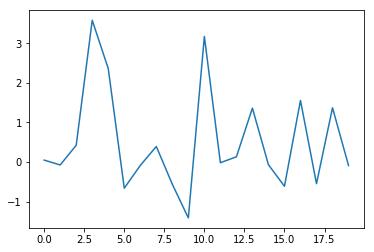

In [3]:
# Extremely flexible
# By default it assumes that list of y(axis) values are being provided and  auto create x values for us
# In this case it calls range() to get the x values
plt.plot(l1)

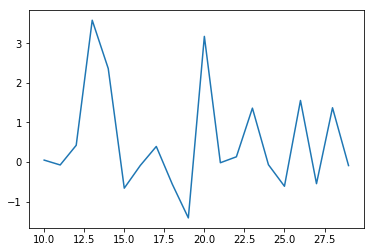

In [4]:
xs = range(10, 10 + len(l1))
plt.plot(xs,l1)

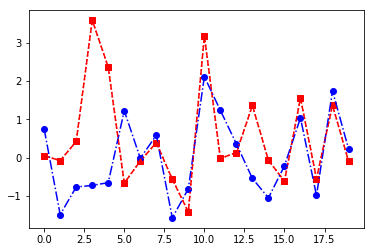

In [5]:
plt.plot(l1, color= 'red', linestyle = 'dashed', marker = 's')
plt.plot(l2, color= 'blue', linestyle = 'dashdot', marker = 'o')
plt.plot(l1, color= 'red', linestyle = 'dotted', marker = '^')

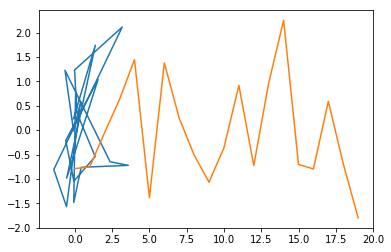

In [6]:
plt.plot(l1, l2, l3)

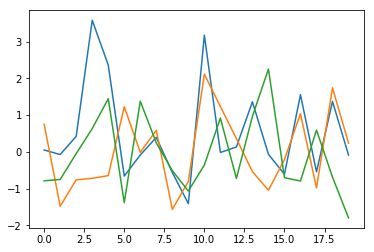

In [7]:
plt.plot(l1,'' ,l2, '',l3,'')

In [8]:
plt.rcParams['axes.prop_cycle']

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


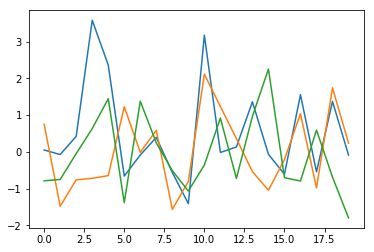

In [9]:
plt.plot(range(len(l1)),l1,range(len(l2)),l2,range(len(l3)),l3)

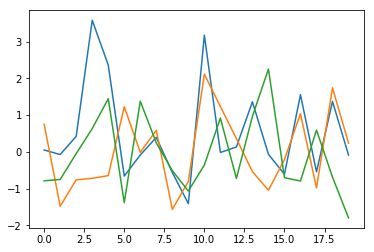

In [10]:
plt.plot(range(len(l1)),l1,l2, '',range(len(l3)),l3)

In [11]:
data  = np.column_stack([l1, l2, l3])

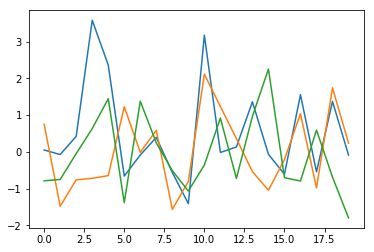

In [12]:
plt.plot(data)

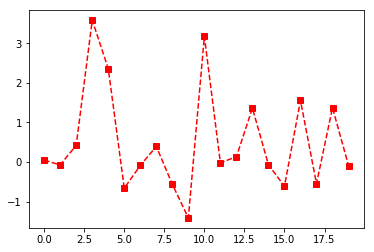

In [13]:
plt.plot(l1,'r--s') # 2nd and 3rd arg plt assumes that its a format string (called markers)

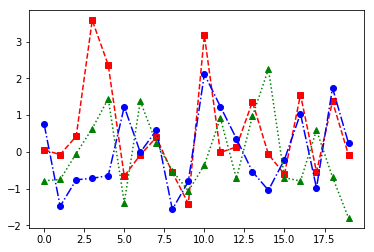

In [14]:
plt.plot(l1, 'r--s', l2, 'b-.o', l3, 'g:^')

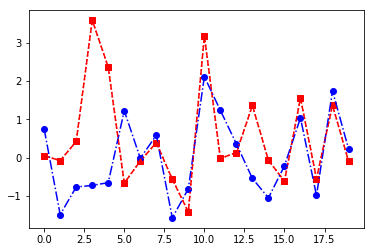

In [15]:
plt.plot(l1, color= 'red', linestyle = 'dashed', marker = 's')
plt.plot(l2, color= 'blue', linestyle = 'dashdot', marker = 'o')
plt.plot(l1, color= 'red', linestyle = 'dotted', marker = '^')

### Getting the data

In [16]:
import csv
import urllib
from collections import namedtuple

# Create a namedtuple constructor for each record in the Iris data
#    1. sepal length in cm
#    2. sepal width in cm
#    3. petal length in cm
#    4. petal width in cm
#    5. class: 
#       -- Iris-setosa
#       -- Iris-versicolour
#       -- Iris-virginica
fields = ('sepal_length', 
          'sepal_width', 
          'petal_length', 
          'petal_width', 
          'species')
IrisRecord = namedtuple('IrisRecord', fields)
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# Download and read in the data from the UCI Machine Learning Repository
response = urllib.request.urlopen(urllib.request.Request(url))
iris_data_csv_bytes = response.read().strip()
iris_data_csv = [str(row,'utf-8') for row in iris_data_csv_bytes.splitlines()]
# Convert each record into a format that's easier to work with (i.e.,
# wrap each record in the namedtuple that we created).
data = []
for row in csv.reader(iris_data_csv):
    data.append(IrisRecord(
        sepal_length          = float(row[0]),
        sepal_width           = float(row[1]),
        petal_length          = float(row[2]),
        petal_width           = float(row[3]),
        species               = row[4]))

## Box plot

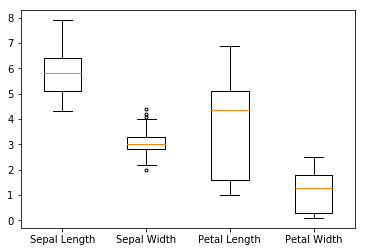

In [17]:
# Convert the Iris data into a 2-dimensional matrix 
# where each column is one feature in the data set.
x = np.column_stack([
    [r.sepal_length for r in data],
    [r.sepal_width for r in data],
    [r.petal_length for r in data],
    [r.petal_width for r in data],
])

# Plot the data. We are changing the look of the outliers (aka, fliers),
# one of the many configurable bits of the boxplot.
plt.boxplot(x, flierprops={'marker':'o',                    # Mark outliers with a circle
                           'markerfacecolor':'none',        # Empty circles (i.e., no color) 
                           'color': 'none',                 # Remove the outlier lines
                           'markersize':3})                 # Reduce the size of the ourlier markers

# Add the x-axis labels offset by 1 so they line up with
# each of the box plots.
names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
plt.xticks(range(1, len(names)+1), names);

In [18]:
import sklearn
from sklearn import datasets

In [19]:
iris = datasets.load_iris()
X_arr = iris.data[:]
y = iris.target
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

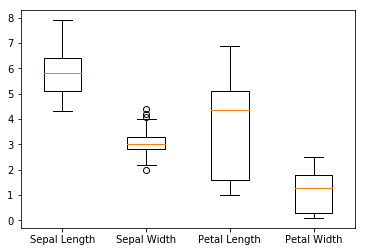

In [20]:
plt.boxplot(X_arr)
names = names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
plt.xticks(range(1, len(names)+1), names);

## Creating a color map

In [21]:
from itertools import cycle
from collections import defaultdict

In [22]:
# Creates a color map of species names to colors
color_cycler = cycle(plt.rcParams['axes.prop_cycle'])
cmap = defaultdict(lambda: next(color_cycler)['color'])

## The Scatter Plot

In [60]:
# Extract the x and y values (i.e., sepal length and width)
# from the data set. Also, create a list of corresponding
# colors based on the species of each record.
sepal_length, sepal_width, colors = [], [], []
for r in data:
    sepal_length.append(r.sepal_length)
    sepal_width.append(r.sepal_width)
    colors.append(cmap[r.species])


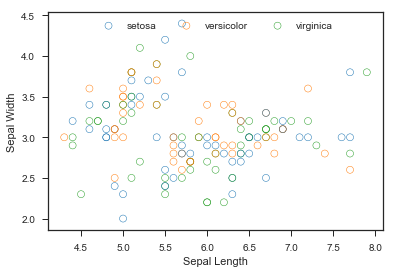

In [59]:
# Plot the data on a scatter plot. Each point will have an outline 
# color according to their species, but we'll leave the centers 
# colorless (for aesthetic purposes only). Finally, we'll reduce
# the line width of each data point (again for aesthetics only).
plt.scatter(sepal_length, sepal_width, edgecolors=colors, c='none', linewidths=0.5)

# Add x and y labels
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

legend_handles = [
    plt.scatter([], [], marker='o', label='setosa', edgecolors=cmap['Iris-setosa'], c='none', linewidths=0.5),
    plt.scatter([], [], marker='o', label='versicolor', edgecolors=cmap['Iris-versicolor'], c='none', linewidths=0.5),
    plt.scatter([], [], marker='o', label='virginica', edgecolors=cmap['Iris-virginica'], c='none', linewidths=0.5)
]

plt.legend(handles=legend_handles, scatterpoints=1, ncol=3, loc='upper center');


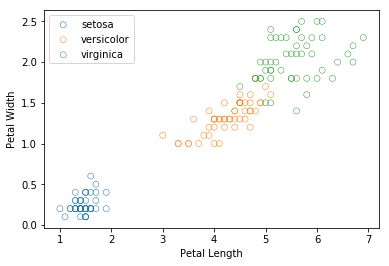

In [25]:
petal_length, petal_width, colors = [], [], []
for r in data:
    petal_length.append(r.petal_length)
    petal_width.append(r.petal_width)
    colors.append(cmap[r.species])

plt.scatter(petal_length, petal_width, edgecolors=colors, c='none', linewidths=0.5)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

legend_handles = [
    plt.scatter([], [], marker='o', label='setosa', edgecolors=cmap['Iris-setosa'], c='none', linewidths=0.5),
    plt.scatter([], [], marker='o', label='versicolor', edgecolors=cmap['Iris-versicolor'], c='none', linewidths=0.5),
    plt.scatter([], [], marker='o', label='virginica', edgecolors=cmap['Iris-virginica'], c='none', linewidths=0.5)
]

plt.legend(handles=legend_handles,  scatterpoints=1, loc='upper left');

## The histogram

Next up is the histogram, a wonderful tool for visualizing the distribution of numerical data. In the next example we'll use matplotlib's hist function to analyze the distribution of one of the features in the Iris data set. For those unfamiliar, a histogram "bins" its given data, i.e., it will divide the data up into several intervals, and then count the number of observations in each bin

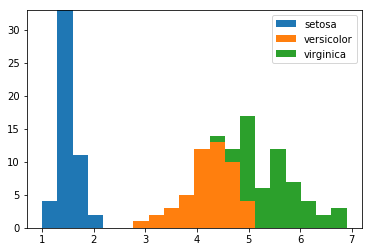

In [26]:
# Split the data set up into one list per species
setosa = [r.petal_length for r in data if r.species == 'Iris-setosa']
versicolor = [r.petal_length for r in data if r.species == 'Iris-versicolor']
virginica = [r.petal_length for r in data if r.species == 'Iris-virginica']

# Create a list of colors (one per species)
colors = [cmap['Iris-setosa'], cmap['Iris-versicolor'], cmap['Iris-virginica']]

# Plot a stacked histogram
plt.hist([setosa, versicolor, virginica], color=colors, histtype='barstacked', bins=20);
plt.legend(labels = ['setosa', 'versicolor', 'virginica'])

In [27]:
import pandas as pd

In [28]:
iris_df = pd.DataFrame(iris.data[:])
iris_df.columns = iris.feature_names
iris_df['speices'] =  iris.target

In [29]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'speices'],
      dtype='object')

In [30]:
setosa_plen = iris_df[iris_df.speices == 0]['petal length (cm)']
versicolor_plen = iris_df[iris_df.speices == 1]['petal length (cm)']
virginica_plen = iris_df[iris_df.speices == 2]['petal length (cm)']

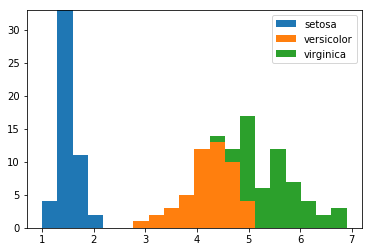

In [31]:
colors = [cmap['Iris-setosa'], cmap['Iris-versicolor'], cmap['Iris-virginica']]

# Plot a stacked histogram
plt.hist([setosa_plen, versicolor_plen, virginica_plen], color=colors, histtype='barstacked', bins=20);
plt.legend(labels = ['setosa', 'versicolor', 'virginica'], )

## Custom plot

### Parallel Coordinates

The parallel coordinates technique is a useful tool for understanding multi-dimensional numerical data, and it can be used to easily visualize clusters in these high-dimensional data sets. This technique displays each observation in a data set as a separate line in the graph where each point in the line is the value for a specific feature in the data set. The visualization can also have variable y-axis scales for each feature, but this isn't necessarily a requirement, and so we'll be leaving that part out of our plotting function, to make things a bit easier on us.
So, now that we have a decent understanding of what we'll be creating, let's go ahead and get our environment setup so we can dive right into the creation of our custom plotting function.

In [32]:
from itertools import cycle
from collections import defaultdict

def parallelcoords(m, target=True):
    """Plots parallel coordinates from a 2D matrix of numerical data
    """ 
    # Create a color map of species names to colors
    color_cycler = cycle(plt.rcParams['axes.prop_cycle'])
    cmap = defaultdict(lambda: next(color_cycler)['color'])
        
    # Plot the data, one line for each record in the data set.
    # Remember calling plot continuously works because pyplot
    # keeps track of the current figure and adds a new line
    # to the current figure every time you call plot.
    for record in m:
        # If the data contains a target variable, plot only the features
        # and use the target variable to determine the color of the line
        if target:
            plt.plot(record[:-1], c=cmap[record[-1]])
        else:
            plt.plot(record)

    # Label the x-axis with the name of each feature in the data set.
    try:
        # If each record is a namedtuple, get the list of fields;
        # we'll use those for the x- and y-axis labels of the 
        # scatterplot matrix. If target is True, don't get the
        # last field name.
        features = m[0]._fields[:-1] if target else m[0]._fields 
    except:
        features = range(len(m[0]) - 1) if target else range(len(m[0]))
    plt.xticks(range(len(features)), features)

    # Grab the y-axis from the current Axes object so we can hide the 
    # origin label since it looks a little crowded otherwise.
    plt.gca().yaxis.get_major_ticks()[0].set_visible(False)

    # Show the grid lines for the x-axis
    plt.grid(axis='x')

    # If we have a target variable in the data, create a legend
    # with an entry for each class in the target variable.
    if target:
        # Get the list of classes for the target variable
        classes = list(set(r[-1] for r in m))

        # Create a few "proxy artists" for creating the legend. Calling the 
        # legend() function without passing in any parameters will create a
        # legend for any labeled data in the graph, so we could do something
        # funky where we add a label for one line per species, but that 
        # doesn't seem as simple and clean as just creating a few lines that
        # we use just to create the legend. Plus, this is an officially 
        # sanctioned way to create a legend (just see the legend docs).
        legend_handles = [plt.Line2D([], [], color=cmap[cls], label=cls) for cls in classes]
        plt.legend(handles=legend_handles);



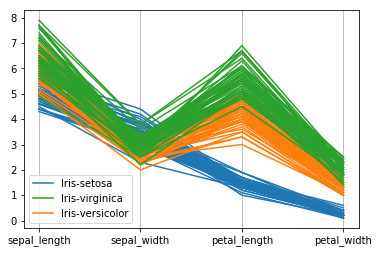

In [33]:
parallelcoords(data)

###  Subplots

In [34]:
from itertools import cycle
from collections import defaultdict

def scatter(m, x=None, y=None, target=None, x_label=None, y_label=None, loc='upper right'):
    """Takes a 2D matrix and keys for getting the x and y values
    
    The x, y, and target parameters are either getter functions 
    that will be used to extract their corresponding values from
    each row, or they are strings which will be used with the
    getattr function to extract the value. If None, it is assumed
    that the x and y values are the first and second in the row
    and the target value is the last value in the row.
    """        
    # Create a color map of species names to colors
    color_cycler = cycle(plt.rcParams['axes.prop_cycle'])
    cmap = defaultdict(lambda: next(color_cycler)['color'])
    
    # Create the x, y, and target values getter functions,
    # and create human readable x and y labels if none 
    # were passed in.
    if x is None:
        x_getter = lambda r: r[0]
    elif isinstance(x, basestring):
        if x_label is None:
            x_label = x.replace('_', ' ').title()
        x_getter = lambda r: getattr(r, x) 
    else:
        x_getter = x
        
    if y is None:
        y_getter = lambda r: r[1]
    elif isinstance(y, basestring):
        if y_label is None:
            y_label = y.replace('_', ' ').title()
        y_getter = lambda r: getattr(r, y) 
    else:
        y_getter = y
        
    if target is None:
        target_getter = lambda r: r[-1]
    elif isinstance(target, basestring):
        target_getter = lambda r: getattr(r, target)
    else:
        target_getter = target
    
    # Extract the x and y values (i.e., sepal length and width)
    # from the data set. Also, create a list of corresponding
    # colors based on the species of each record.
    _x, _y, colors = [], [], []
    for r in data:
        _x.append(x_getter(r))
        _y.append(y_getter(r))
        colors.append(cmap[target_getter(r)])

    # Plot the data on a scatter plot. Each point will have an outline 
    # color according to their species, but we'll leave the centers 
    # colorless (for aesthetic purposes only). Finally, we'll reduce
    # the line width of each data point (again for aesthetics only).
    plt.scatter(_x, _y, edgecolors=colors, c='none', linewidths=0.5)

    # Add x and y labels
    if x_label is not None:
        plt.xlabel(x_label)
    if y_label is not None:
        plt.ylabel(y_label)
    
    # Get the list of classes for the target variable
    classes = list(set(r[-1] for r in m))

    # Create a few "proxy artists" for creating the legend. Calling the 
    # legend() function without passing in any parameters will create a
    # legend for any labeled data in the graph, so we could do something
    # funky where we add a label for one line per species, but that 
    # doesn't seem as simple and clean as just creating a few lines that
    # we use just to create the legend. Plus, this is an officially 
    # sanctioned way to create a legend (just see the legend docs).
    legend_handles = [plt.Line2D([], [], color=cmap[cls], label=cls) for cls in classes]
    plt.legend(handles=legend_handles, loc=loc);

## Drawing Multiple Plots With `subplot`

The `subplot` function can be used to create a single plot in a grid of subplots. It takes three integer values: the first two describe the shape of the grid and the third is the index of the subplot you want to create. So, for example, if we wanted to create a pair of subplots, one beside the other horizontally, we would call the `subplot` function with the first number set to 1, to signify that our grid will have 1 row, and the second number set to 2, to signify that our grid will contain 2 columns. Our grid would then contain 2 sublots, numbered 1 and 2, since the `subplot` function assumes that subplots are indexed starting at 1.


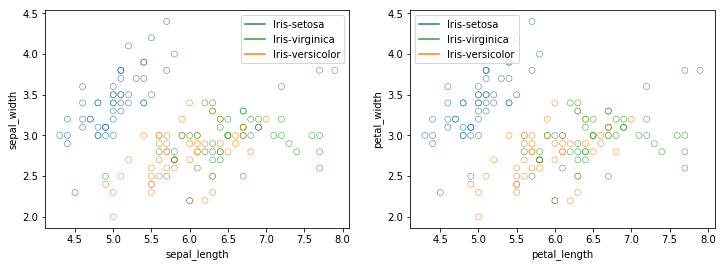

In [39]:
# Adjust the width to fit two plots side-by-side
plt.gcf().set_figwidth(12)

# Create the first plot in a 1x2 grid
plt.subplot(1, 2, 1)
scatter(data, x_label='sepal_length', y_label='sepal_width')

# Create the second plot in a 1x2 grid.
# For grids that have less than 10 subplots, you can use
# the shorthand below where you leave out the commas between
# the number of rows, number of columns, and index values.
plt.subplot(122)
scatter(data, x_label='petal_length', y_label='petal_width', loc='upper left')

#### Display vertically

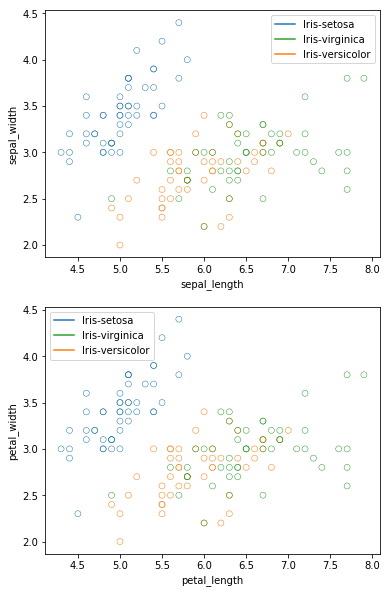

In [41]:
# The difference between the subplot and subplots
# functions is that the former creates a single 
# axes object every time it's called, whereas the
# the latter creates all of the axes objects at once.
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)

# Since we created all of the xes objects ahead of time, 
# we have to set the current axes ourselves before calling
# the scatter function. Below we set the current axes to 
# the first Axes object before plotting the sepal dimensions.
plt.sca(ax1)
scatter(data, x_label='sepal_length', y_label='sepal_width')

# Plot the petal dimensions in the second axes
plt.sca(ax2)
scatter(data, x_label='petal_length', y_label='petal_width', loc='upper left')

## Adjusting Subplots

In the code below we use the `subplots` function to create a 3x2 grid. Let's run it and see how it looks.

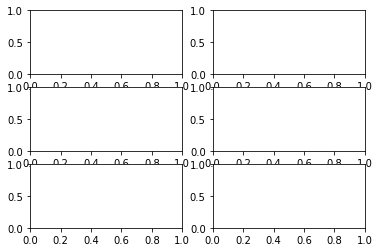

In [42]:
plt.subplots(3, 2);

### Tight Layout

It doesn't look too bad, but the vertical spacing between each subplot is a little tight---notice that there's a little overlap with some of the x-axis labels. If you want to fix that, and make the plots fit together much better, you can simply call the `pyplot.tight_layout` function. The [`tight_layout`][1] function automatically adjusts the parameters of the subplots so that they fit nicely within the figure. 

Let's go ahead and give it a try now to see how well it works.

[1]: http://matplotlib.org/users/tight_layout_guide.html

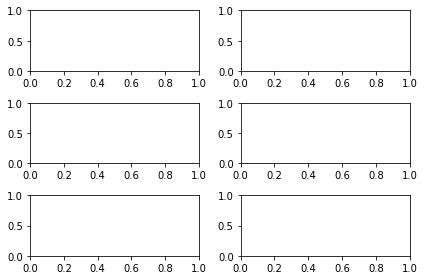

In [43]:
plt.subplots(3, 2)
plt.tight_layout();

### `pyplot.subplots_adjust`

Well, that looks much better! The `tight_layout` function is really nice and should solve most of your problems, but as of now, it's still an experimental feature and not guaranteed to work. If you do run into problems with it, you can fall back on the `pyplot.subplots_adjust` function to change some, or all, of the attributes of the grid. 

The example below uses this function to adjust the vertical spacing, or hspace for height, between each plot.

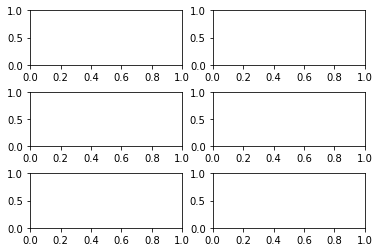

In [44]:
plt.subplots(3, 2)
plt.subplots_adjust(hspace=0.5);

## The `scatterplot_matrix` Function

The `scatterplot_matrix` function in the cell below, offers a very simple interface. It takes a 2D matrix of data, and an optional keyword argument `target`, which is just a boolean that specifies whether or not the matrix contains a column for the target variable. If the target parameter is `True`, which is the default value, then our function assumes that the last column in the matrix is the target variable and it will use the classes in that variable to color code the data in the matrix, otherwise, everything will be displayed in a single color.


In [45]:
from itertools import cycle
from collections import defaultdict

def scatterplot_matrix(m, target=True):
    """Takes a MxN matrix and draws a scatterplot matrix
    
    This function assumes that each row in the matrix is 
    organized as features first, followed by the target 
    variable unless the target parameter is set to False.
    In that case, each row is considered to contain only
    features of the data.
    
    Keyword arguments:
    target -- if True, the last column in m is the target variable
    """
    try:
        # If each record is a namedtuple, get the list of fields;
        # we'll use those for the x- and y-axis labels of the 
        # scatterplot matrix. If target is True, don't get the
        # last field name.
        features = m[0]._fields[:-1] if target else m[0]._fields 
    except:
        features = range(len(m[0]) - 1) if target else range(len(m[0]))
        
    # If the matrix contains a target variables, create a list of classes
    if target:    
        classes = list(set(r[-1] for r in m))
        
    # Create a color map of species names to colors
    color_cycler = cycle(plt.rcParams['axes.prop_cycle'])
    cmap = defaultdict(lambda: next(color_cycler)['color'])
        
    # Set the size of the plot
    fig = plt.figure(figsize=(12, 12))
            
    # Loop through every feature and plot it against every feature
    for i, feature_row in enumerate(features):
        for j, feature_col in enumerate(features):
            # Create a new subplot
            plt.subplot(len(features), len(features), i*len(features)+j+1)
            
            # Plot the scatter plot for the current pair of features
            if i != j:
                x = [r[j] for r in m]
                y = [r[i] for r in m]
                if target:
                    c = [cmap[r[-1]] for r in m]
                else:
                    c = 'b'
                plt.scatter(x, y, edgecolors='w', c=c, linewidths=0.5)
            
            # Plot the histogram on the diagonal
            if target and i == j:
                df = [[r[i] for r in m if r[-1] == cls] for cls in classes]               
                colors = [cmap[cls] for cls in classes]
                plt.hist(df, color=colors, histtype='barstacked')
            elif i == j:
                plt.hist([r[i] for r in m], color='b', histtype='barstacked')
                                
            # Turn off the x-axis labels for everything but the last row
            if i < len(features) - 1:
                plt.tick_params(labelbottom='off')
            else:
                plt.xlabel(feature_col)
                
            # Turn off the y-axis labels for everything but the last column
            if j > 0:
                plt.tick_params(labelleft='off')
            else:
                plt.ylabel(feature_row)
            
            # Turn off all tick marks and make the label size 
            # a bit smaller than the default
            plt.tick_params(top='off', bottom='off', left='off', right='off', labelsize=8)

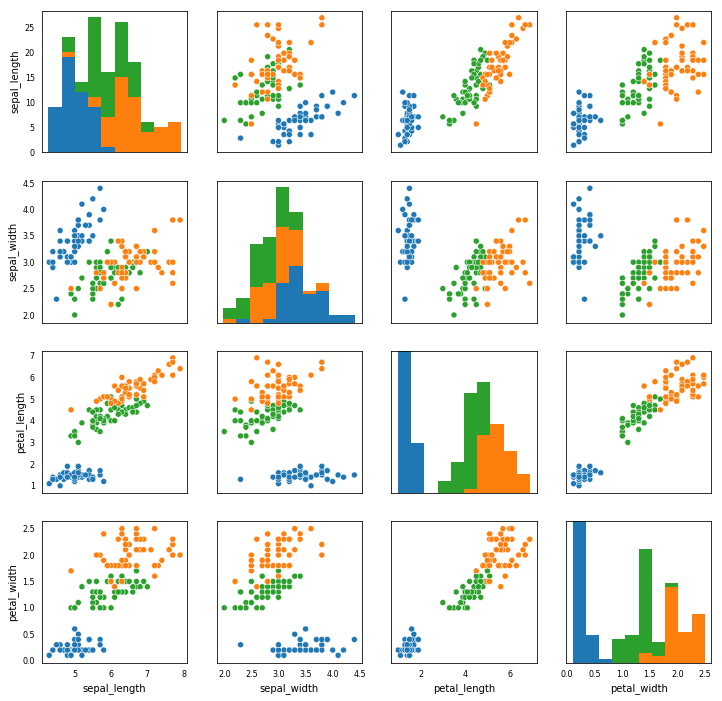

In [46]:
scatterplot_matrix(data)

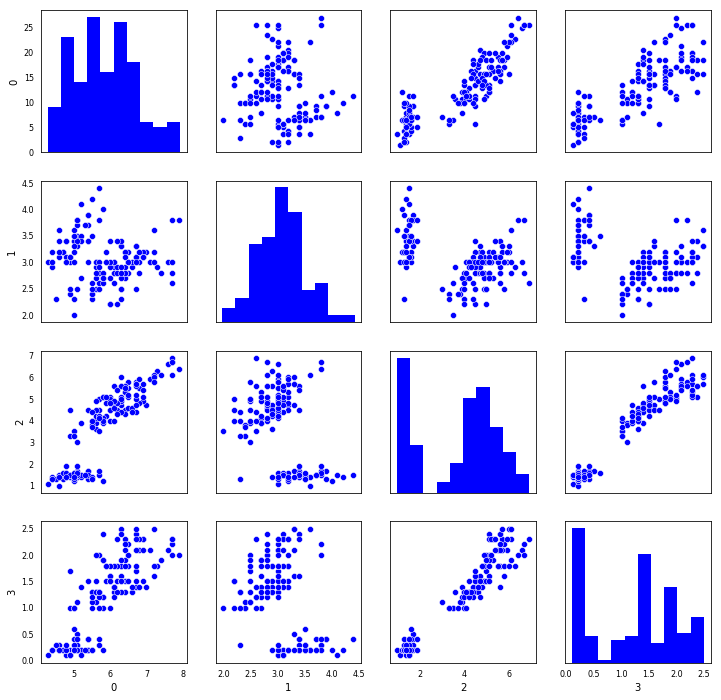

In [47]:
scatterplot_matrix([row[:-1] for row in data],target = False)

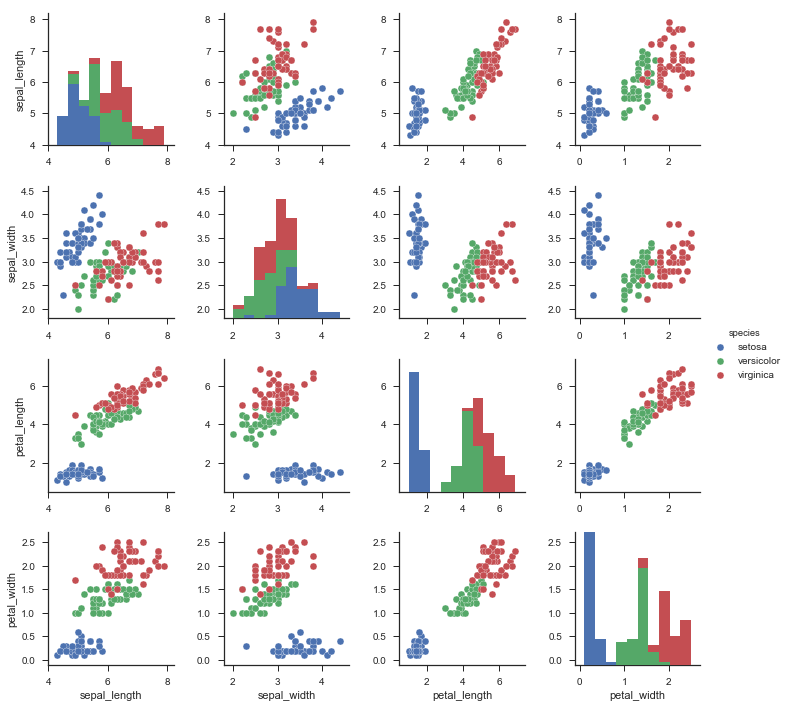

In [48]:
import seaborn as sns; sns.set(style="ticks", color_codes=True) 
iris = sns.load_dataset("iris")
g = sns.pairplot(iris,hue="species")


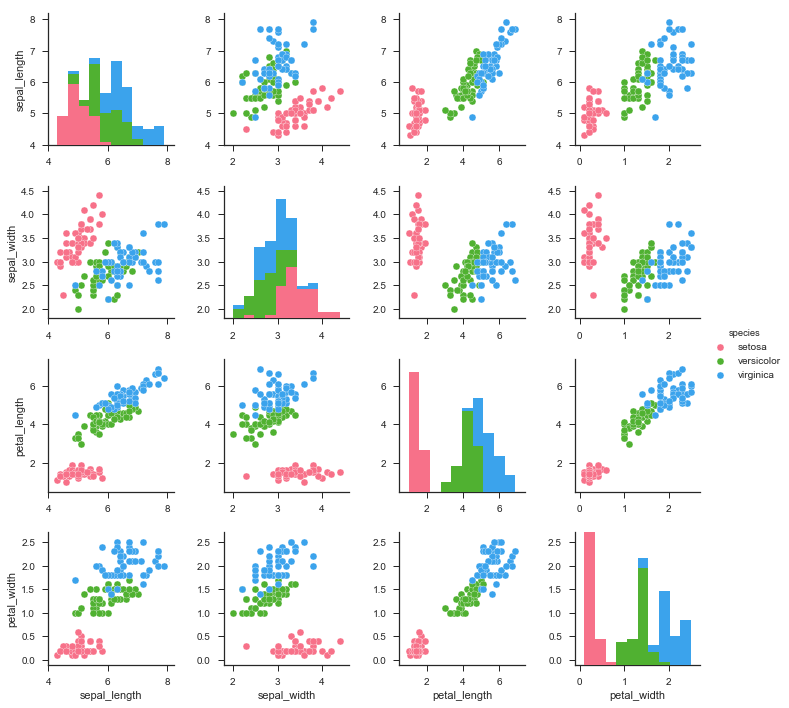

In [49]:
g = sns.pairplot(iris, hue="species", palette="husl")

## Complex subplots

## The `subplot2grid` Function

<!---
We've already seen that we can call the `subplot` function with a set of integers, where the first two describe the shape of the grid and, the third specifies the index of the grid cell we want to create subplot in. This is easy to use and does the job in most cases, but when you need to create a subplot that spans multiple cells, you'll need to use the `subplot2grid` function.
--->

You can think of the `subplot2grid` function as a superset of the `subplot` function. In other words, anything that you can do with the `subplot` function, you can do with the `subplot2grid` function. In that sense, you could actually just use the `subplot2grid` function for all of your plotting needs, and the next bit of code proves it.

In the code below we use the `subplot` function to create a simple 2x2 grid of cells and the first 2 subplots in that grid.

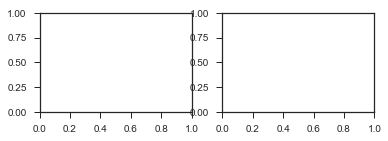

In [50]:
# Create a 2x2 grid of cells and use the subplot function
# to create the subplots in the first row.
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)

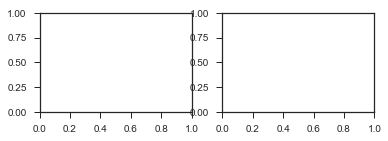

In [51]:
# Use the subplot2grid function to create the subplots in the bottom row.
# First tuple dimension of the grid and 2nd tuple contains row and columns cordinates
ax3 = plt.subplot2grid((2, 2), (1, 0))
ax4 = plt.subplot2grid((2, 2), (1, 1))

In [52]:
# Add row and column coordinates to each of the plots in the grid
ax1.text(0.5, 0.5, "(0, 0)", horizontalalignment='center', verticalalignment='center', fontsize=20)
ax2.text(0.5, 0.5, "(0, 1)", horizontalalignment='center', verticalalignment='center', fontsize=20)
ax3.text(0.5, 0.5, "(1, 0)", horizontalalignment='center', verticalalignment='center', fontsize=20)
ax4.text(0.5, 0.5, "(1, 1)", horizontalalignment='center', verticalalignment='center', fontsize=20);

In [53]:
# The tight_layout function works no matter how you create
# the subplots in your figure.
plt.tight_layout()
plt.show()

#### A more complex example

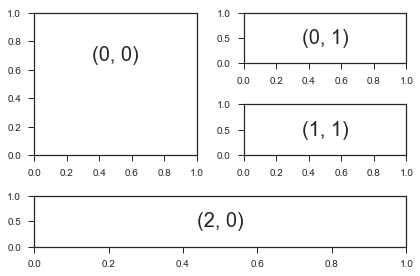

In [62]:
# Create a 3x2 grid with four cells, where one spans across
# multiple rows, and another spans multiple columns.
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 2), (0, 1))
ax3 = plt.subplot2grid((3, 2), (1, 1))
ax4 = plt.subplot2grid((3, 2), (2, 0), colspan=2)

# Add row and coordinate labels to the ac of the cells in the grid
ax1.text(0.5, 0.7, "(0, 0)", horizontalalignment='center', verticalalignment='center', fontsize=20)
ax2.text(0.5, 0.5, "(0, 1)", horizontalalignment='center', verticalalignment='center', fontsize=20)
ax3.text(0.5, 0.5, "(1, 1)", horizontalalignment='center', verticalalignment='center', fontsize=20)
ax4.text(0.5, 0.5, "(2, 0)", horizontalalignment='center', verticalalignment='center', fontsize=20)

# Make the cells are properly spaced
plt.tight_layout()
plt.show()